# Actividad de Laboratorio 2

## Benjamín Irarrázabal, Joaquín Zepeda

# Parte 0, Importar librerías y cargar imágenes en variables

In [29]:
# Importamos librerías importantes
import cv2 
import numpy as np
import matplotlib.pyplot as plt 

(-0.5, 601.5, 501.5, -0.5)

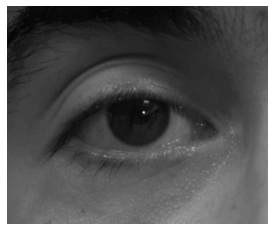

In [30]:
# Cargamos y mostramos la primera imagen de prueba
img_I1_g = cv2.imread('I1_gal.jpg')
I1_g = cv2.cvtColor(img_I1_g, cv2.COLOR_BGR2GRAY)
plt.imshow(I1_g,cmap='gray')
plt.axis('off')

In [31]:
# Observamos las dimensiones de la imagen
I1_g.shape

(502, 602)

## Parte 0.1, Cargar todas las imágenes

In [32]:
"""
 A continuación, cargamos TODAS las imágenes de ojos en variables distintas para su 
 posterior uso  
"""
nombres_gal = []
gal = []
test = []
Imp = []

for i in range(1,11):

    # Imágenes del conjunto galería
    img_gal = cv2.imread('I'+str(i)+'_gal.jpg')
    img_gal = cv2.cvtColor(img_gal, cv2.COLOR_BGR2GRAY)
    gal.append(img_gal)
    nombres_gal.append('I'+str(i)+'_gal.jpg')
    
    # Imágenes del conjunto test
    img_test = cv2.imread('I'+str(i)+'_test.jpg')
    img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)
    test.append(img_test)
    
    if i<=3:
        # Imágenes del conjunto impostor
        img_imp = cv2.imread('imp_000'+str(i)+'.jpg')
        img_imp = cv2.cvtColor(img_imp, cv2.COLOR_BGR2GRAY)
        Imp.append(img_imp)

# Parte 1, Definición del algoritmo LBP

In [34]:
"""
A continuación comienza la definición del algoritmo LBP, el cual se aplicará a todas las imagenes de la carpeta ojos_gal.
"""
def LBP(img):
  matriz_lbp = np.zeros_like(img) # Creamos una matriz de ceros del mismo tamaño que la imagen original
  potencias_binarias = [128,64,32,1,16,2,4,8] # Vector de potencias de dos

  for i in range(1,img.shape[0]-1): # Iteración principal
    for j in range(1,img.shape[1]-1):
        
        centro = img[i,j] # Tomamos el valor central de la matriz de 3x3
        exteriores = [  img[i-1,j-1],img[i-1,j],img[i-1,j+1],
                        img[i,j-1],             img[i,j+1],
                        img[i+1,j-1],img[i+1,j],img[i+1,j+1]] # Valores vecinos al central
        valor_bin = [] # Lista vacía
        h=0 # h inicial 
        for val in exteriores: # Esta iteración realiza la comparación entre el centro y sus vecinos
            if val<=centro:
                h=0
            else:
                h=1
            valor_bin.append(h) # guardamos en la lista el valor binario 
        valor_decimal = np.dot(valor_bin,potencias_binarias) # realizamos el producto punto para obtener los valores decimales
        matriz_lbp[i,j] = valor_decimal # Se obtiene la matriz LBP que contiene la imagen luego del algoritmo
  # Se muestra la imagen
  return matriz_lbp[1:-1,1:-1]

(-0.5, 599.5, 499.5, -0.5)

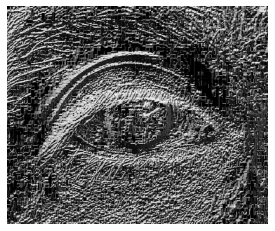

In [35]:
a = LBP(gal[0]) # Se muestra la imagen de prueba para comprobar que la función realiza el algoritmo correctamente
plt.imshow(a,cmap='gray')
plt.axis('off')

Text(0.5, 1.0, 'LBP de la Imagen Impostor 3')

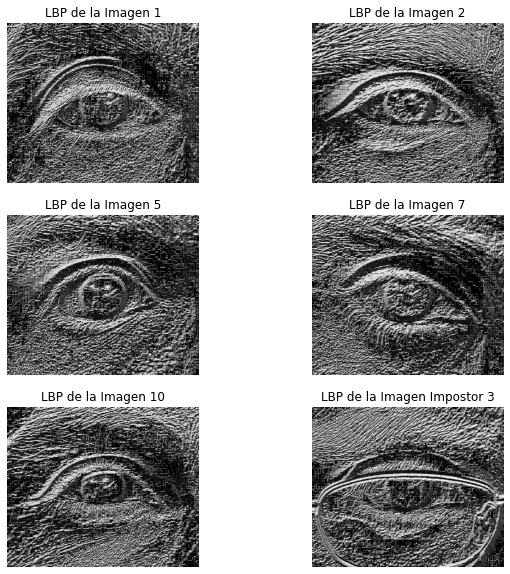

In [57]:
# A continuación se mostrarán otros ejemplos del algoritmo LBP para observar su comportamiento.
b = LBP(gal[1])
c = LBP(gal[4])
d = LBP(gal[6])
e = LBP(gal[9])
f = LBP(Imp[2])

fig = plt.figure(figsize=(10, 10))
rows = 3
columns = 2

fig.add_subplot(rows, columns, 1) 
plt.imshow(a,cmap='gray')
plt.axis('off')
plt.title('LBP de la Imagen 1')

fig.add_subplot(rows, columns, 2) 
plt.imshow(b,cmap='gray')
plt.axis('off')
plt.title('LBP de la Imagen 2')

fig.add_subplot(rows, columns, 3) 
plt.imshow(c,cmap='gray')
plt.axis('off')
plt.title('LBP de la Imagen 5')

fig.add_subplot(rows, columns, 4) 
plt.imshow(d,cmap='gray')
plt.axis('off')
plt.title('LBP de la Imagen 7')

fig.add_subplot(rows, columns, 5) 
plt.imshow(e,cmap='gray')
plt.axis('off')
plt.title('LBP de la Imagen 10')

fig.add_subplot(rows, columns, 6) 
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.title('LBP de la Imagen Impostor 3')


## Parte 1.1, Comentarios sobre LBP

En las imágenes anteriores se puede apreciar el funcionamiento del algoritmo y como este permite modificar la visualización de la imagen (característica de textura) y que posteriormente sea más sencilla la extracción de características (histogramas).

# Parte 2, Métodos de partición y obtención de histograma

## Parte 2.1, Extracción de Histogramas con Método 1

In [37]:
"""
La siguiente función modela el primer algoritmo de partición, el cual
divide la imagen de entrada img en 25 regiones de 120x100 pixeles, luego, le calcula el histograma de 
59 puntos (bins) y los concatena obteniendo un arreglo de largo 1475
"""
def Metodo1(img):
  M_LBP = LBP(img) # Se obtiene la imagen con el algoritmo LBP aplicado
  histogramas = []
  for j in range(5): # Iteración principal para extraer las ventanas
    for i in range(5):
      crop_img = M_LBP[i*120:(i+1)*120,j*100:(j+1)*100]
      histogramas.append(np.histogram(crop_img,bins=59)[0]) # cálculo iterativo de histogramas
  hist=np.array([])
  for i in range(len(histogramas)): # Concatenación de los 25 histogramas
    hist = np.concatenate([hist,histogramas[i]])
  return hist

In [38]:
print(Metodo1(gal[0]), Metodo1(gal[0]).shape) # Prueba

[1837.  511.  238. ...    4.   41.   71.] (1475,)


In [39]:
# Definimos listas vacías que guardarán los histogramas (luego se convertirán en arrays de numpy)
Hist_gal_M1 = []
Hist_test_M1 = []
Hist_Imp_M1 = []

# Iteramos utilizando la función definida anteriormente
for i in range(len(gal)):
  Hist_gal_M1.append(Metodo1(gal[i]))
for i in range(len(test)):
  Hist_test_M1.append(Metodo1(test[i]))
for i in range(len(Imp)):
  Hist_Imp_M1.append(Metodo1(Imp[i]))

## Parte 2.2, Extracción de Histogramas con Método 2

In [40]:
"""
La siguiente función modela el segundo algoritmo de partición, el cual
divide la imagen de entrada img en 99 regiones de 100x100 pixeles con traslape de 50 pixeles, luego, le calcula el histograma de 
59 puntos (bins) y los concatena obteniendo un arreglo de largo 5841
"""
def Metodo2(img):
  M_LBP = LBP(img)
  histogramas = []
  for j in range(9): # Iteración principal del algoritmo
    for i in range(11):
        if j==0 and i==0:
            crop_img = M_LBP[i*100:(i+1)*100,j*100:(j+1)*100]
        elif j==0:
            crop_img = M_LBP[i*100-50:(i+1)*100-50,j*100:(j+1)*100]
        else:
            crop_img = M_LBP[i*100-50:(i+1)*100-50,j*100-50:(j+1)*100-50]

        histogramas.append(np.histogram(crop_img,bins=59)[0])
  hist=np.array([])
  for i in range(len(histogramas)): # Concatenación de los 99 histogramas
    hist = np.concatenate([hist,histogramas[i]])
  return hist

In [41]:
print(Metodo2(gal[0]), Metodo2(gal[0]).shape) # Prueba

[1569.  395.  178. ...    0.    0.    0.] (5841,)


In [42]:
# Definimos listas vacías que guardarán los histogramas (luego se convertirán en arrays de numpy)
Hist_gal_M2 = []
Hist_test_M2 = []
Hist_Imp_M2 = []

# Iteramos utilizando la función definida anteriormente
for i in range(len(gal)):
  Hist_gal_M2.append(Metodo2(gal[i]))
for i in range(len(test)):
  Hist_test_M2.append(Metodo2(test[i]))
for i in range(len(Imp)):
  Hist_Imp_M2.append(Metodo2(Imp[i]))

# Parte 3, Definición de distancia

In [43]:
"""
La siguiente función obtiene la distancia entre dos arreglos de largo n según 
lo explicitado en el enunciado
"""
def distancia(x,y):
    suma = 0
    for xi,yi in zip(x,y):
        suma+= abs(xi-yi)
    return suma 

# Parte 4, Creación de la base de datos

In [44]:
lbp_gal = []

for I in gal:
    lbp_gal.append(LBP(I))

In [45]:
import pandas as pd

#Creamos una tabla que guarda la información de las imagenes
#Esto incluye procesar las imágenes usando LBP, la posterior extracción 
#y almacenamiento del vector de características para cada una de ellas. 
df = pd.DataFrame({
    "nombre_imagen":nombres_gal,
    "imagen": gal,
    "lbp_gal": lbp_gal,
    "vector_caracteristicas_1":Hist_gal_M1,
    "vector_caracteristicas_2":Hist_gal_M2} )

In [46]:
df.head()

,nombre_imagen,imagen,lbp_gal,vector_caracteristicas_1,vector_caracteristicas_2
0,I1_gal.jpg,"[[66, 66, 66, 66, 66, 66, 66, 66, 69, 68, 68, ...","[[0, 0, 0, 0, 0, 0, 56, 64, 128, 0, 24, 0, 56,...","[1837.0, 511.0, 238.0, 950.0, 19.0, 230.0, 135...","[1569.0, 395.0, 178.0, 817.0, 13.0, 155.0, 107..."
1,I2_gal.jpg,"[[92, 92, 93, 94, 94, 95, 96, 96, 97, 97, 98, ...","[[56, 56, 0, 56, 56, 0, 56, 0, 56, 56, 0, 56, ...","[1697.0, 303.0, 169.0, 903.0, 8.0, 172.0, 1178...","[1473.0, 262.0, 134.0, 694.0, 7.0, 153.0, 903...."
2,I3_gal.jpg,"[[109, 109, 109, 109, 109, 109, 109, 109, 109,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[2502.0, 412.0, 161.0, 746.0, 36.0, 178.0, 108...","[2178.0, 325.0, 129.0, 636.0, 30.0, 163.0, 957..."
3,I4_gal.jpg,"[[96, 96, 95, 96, 97, 98, 99, 100, 100, 101, 1...","[[0, 187, 56, 56, 56, 56, 0, 48, 48, 32, 96, 1...","[1242.0, 256.0, 113.0, 318.0, 36.0, 183.0, 122...","[1079.0, 228.0, 97.0, 274.0, 27.0, 151.0, 947...."
4,I5_gal.jpg,"[[82, 79, 75, 74, 74, 73, 69, 66, 72, 77, 85, ...","[[131, 231, 239, 254, 222, 128, 56, 28, 62, 60...","[1244.0, 440.0, 155.0, 958.0, 61.0, 198.0, 126...","[970.0, 347.0, 113.0, 712.0, 57.0, 148.0, 1064..."


In [47]:
len(df['vector_caracteristicas_1'][0]),len(df['vector_caracteristicas_2'][0])

(1475, 5841)

In [48]:
#Guardamos la tabla en un archivo pickle
df.to_pickle("Base de datos experiencia 2.pkl")

In [49]:
#Leemos la base de datos para ver que se haya guardado bien
df_read = pd.read_pickle('Base de datos experiencia 2.pkl')
len(df_read['vector_caracteristicas_1'][0]),len(df_read['vector_caracteristicas_2'][0])

(1475, 5841)

# Parte 5, Prueba de reconocimiento

In [50]:
"""
La siguiente función guardará en una lista las distancias correspondientes para las pruebas de reconocimiento
"""
def Prueba(hist, Lista_hist):
  D = []
  for i in range(len(Lista_hist)):
    D.append(distancia(hist,Lista_hist[i]))
  return D

In [51]:
"""
En esta prueba se tomará cada uno de los histogramas de las imágenes test procesadas y se le aplicará
la función distancia con cada uno de los histogramas de las imágenes de galería procesadas.
"""
# ------------------ MÉTODO 1 -------------------------------
# Para la primera imagen:
D_I1_M1 = Prueba(Hist_test_M1[0],Hist_gal_M1)

# Para la segunda imagen:
D_I2_M1 = Prueba(Hist_test_M1[1],Hist_gal_M1)

# Para la tercera imagen:
D_I3_M1 = Prueba(Hist_test_M1[2],Hist_gal_M1)

# Para la cuarta imagen:
D_I4_M1 = Prueba(Hist_test_M1[3],Hist_gal_M1)

# Para la quinta imagen:
D_I5_M1 = Prueba(Hist_test_M1[4],Hist_gal_M1)

# Para la sexta imagen:
D_I6_M1 = Prueba(Hist_test_M1[5],Hist_gal_M1)

# Para la séptima imagen:
D_I7_M1 = Prueba(Hist_test_M1[6],Hist_gal_M1)

# Para la octava imagen:
D_I8_M1 = Prueba(Hist_test_M1[7],Hist_gal_M1)

# Para la novena imagen:
D_I9_M1 = Prueba(Hist_test_M1[8],Hist_gal_M1)

# Para la décima imagen:
D_I10_M1 = Prueba(Hist_test_M1[9],Hist_gal_M1)

# ------------------ MÉTODO 2 -------------------------------
# Para la primera imagen:
D_I1_M2 = Prueba(Hist_test_M2[0],Hist_gal_M2)

# Para la segunda imagen:
D_I2_M2 = Prueba(Hist_test_M2[1],Hist_gal_M2)

# Para la tercera imagen:
D_I3_M2 = Prueba(Hist_test_M2[2],Hist_gal_M2)

# Para la cuarta imagen:
D_I4_M2 = Prueba(Hist_test_M2[3],Hist_gal_M2)

# Para la quinta imagen:
D_I5_M2 = Prueba(Hist_test_M2[4],Hist_gal_M2)

# Para la sexta imagen:
D_I6_M2 = Prueba(Hist_test_M2[5],Hist_gal_M2)

# Para la séptima imagen:
D_I7_M2 = Prueba(Hist_test_M2[6],Hist_gal_M2)

# Para la octava imagen:
D_I8_M2 = Prueba(Hist_test_M2[7],Hist_gal_M2)

# Para la novena imagen:
D_I9_M2 = Prueba(Hist_test_M2[8],Hist_gal_M2)

# Para la décima imagen:
D_I10_M2 = Prueba(Hist_test_M2[9],Hist_gal_M2)

In [52]:
"""
Ahora para analizar los aciertos basta con observar la posición del valor mínimo de cada lista,
donde debe calzar este índice con la respectiva imagen que se prueba.
Por ejemplo, al ver la lista D_I1_M1, es la comparación de la primera imagen de test con todas las de galería,
por lo tanto, la posición del valor mínimo de distancia debe ser '0' para que corresponda con la primera
imagen de galería y el acierto sea correcto.
"""
# ------------------ MÉTODO 1 -------------------------------

posiciones_M1 = []

min1 = np.min(D_I1_M1)
posiciones_M1.append(D_I1_M1.index(min1))

min2 = np.min(D_I2_M1)
posiciones_M1.append(D_I2_M1.index(min2))

min3 = np.min(D_I3_M1)
posiciones_M1.append(D_I3_M1.index(min3))

min4 = np.min(D_I4_M1)
posiciones_M1.append(D_I4_M1.index(min4))

min5 = np.min(D_I5_M1)
posiciones_M1.append(D_I5_M1.index(min5))

min6 = np.min(D_I6_M1)
posiciones_M1.append(D_I6_M1.index(min6))

min7 = np.min(D_I7_M1)
posiciones_M1.append(D_I7_M1.index(min7))

min8 = np.min(D_I8_M1)
posiciones_M1.append(D_I8_M1.index(min8))

min9 = np.min(D_I9_M1)
posiciones_M1.append(D_I9_M1.index(min9))

min10 = np.min(D_I10_M1)
posiciones_M1.append(D_I10_M1.index(min10))

# ------------------ MÉTODO 2 -------------------------------

posiciones_M2 = []

min11 = np.min(D_I1_M2)
posiciones_M2.append(D_I1_M2.index(min11))

min12 = np.min(D_I2_M2)
posiciones_M2.append(D_I2_M2.index(min12))

min13 = np.min(D_I3_M2)
posiciones_M2.append(D_I3_M2.index(min13))

min14 = np.min(D_I4_M2)
posiciones_M2.append(D_I4_M2.index(min14))

min15 = np.min(D_I5_M2)
posiciones_M2.append(D_I5_M2.index(min15))

min16 = np.min(D_I6_M2)
posiciones_M2.append(D_I6_M2.index(min16))

min17 = np.min(D_I7_M2)
posiciones_M2.append(D_I7_M2.index(min17))

min18 = np.min(D_I8_M2)
posiciones_M2.append(D_I8_M2.index(min18))

min19 = np.min(D_I9_M2)
posiciones_M2.append(D_I9_M2.index(min19))

min20 = np.min(D_I10_M2)
posiciones_M2.append(D_I10_M2.index(min20))

# Ahora imprimimos ambas listas de posiciones:
print(posiciones_M1, posiciones_M2) # TODOS LOS ACIERTOS SON CORRECTOS!!!

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Como todas las posiciones están ordenadas, se comprueba que el método funciona correctamente y que todas las pruebas de reconocimiento son positivas, obteniendo solamente aciertos.

# Parte 6, Preguntas finales

In [53]:
"""
Para analizar la situación de los impostores usaremos nuevamente la función de Prueba para aplicar la distancia entre histogramas y ver que sucede
"""
# ------------------ MÉTODO 1 -------------------------------
D_Imp1_M1 = Prueba(Hist_Imp_M1[0], Hist_gal_M1)

D_Imp2_M1 = Prueba(Hist_Imp_M1[1], Hist_gal_M1)

D_Imp3_M1 = Prueba(Hist_Imp_M1[2], Hist_gal_M1)

# ------------------ MÉTODO 2 -------------------------------
D_Imp1_M2 = Prueba(Hist_Imp_M2[0], Hist_gal_M2)

D_Imp2_M2 = Prueba(Hist_Imp_M2[1], Hist_gal_M2)

D_Imp3_M2 = Prueba(Hist_Imp_M2[2], Hist_gal_M2)


## 6.1, Estrategia a utilizar

Primero, se realiza la prueba de las distancias para todas las imágenes del conjunto impostor, es decir, tomamos la primera y la comparamos con todas las del conjunto galería y luego tomamos la segunda y asi sucesivamente, luego, se unen estas tres listas de distancias formadas y se busca el mínimo y su posición, recordando que las posiciones 0-9 son del impostor 1, del 10-19 son del impostor 2 y del 20 al 29 son del impostor 3. Luego, sólo bastará observar la posición que nos entregue el método y veremos el falso impostor.

In [54]:
D_impostores_M1 = []
D_impostores_M1+=D_Imp1_M1
D_impostores_M1+=D_Imp2_M1
D_impostores_M1+=D_Imp3_M1
min_M1 = np.min(D_impostores_M1)
index_M1 = D_impostores_M1.index(min_M1)
print(min_M1,index_M1)

36170.0 11


In [55]:
D_impostores_M2 = []
D_impostores_M2+=D_Imp1_M2
D_impostores_M2+=D_Imp2_M2
D_impostores_M2+=D_Imp3_M2
min_M2 = np.min(D_impostores_M2)
index_M2 = D_impostores_M2.index(min_M2)
print(min_M2,index_M2)

51904.0 11


EN AMBOS CASO NOS ENTREGA QUE EL VALOR MINIMO DE DISTANCIA ESTÁ EN LA POSICIÓN 11, ES DECIR, QUE EL FALSO IMPOSTOR ES LA SEGUNDA IMAGEN 'imp_0002' YA QUE CORRESPONDE A LA SEGUNDA IMAGEN DE GALERÍA.

Text(0.5, 1.0, 'Imagen 2 de galería')

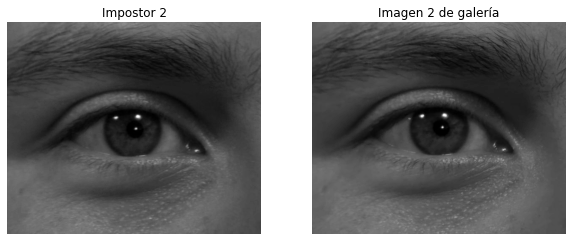

In [56]:
# Ahora mostramos ambas imágenes para comprobar que sea efectivamente correcto el método.
fig = plt.figure(figsize=(10, 10))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1) 
plt.imshow(Imp[1],cmap='gray')
plt.axis('off')
plt.title('Impostor 2')

fig.add_subplot(rows, columns, 2) 
plt.imshow(gal[1],cmap='gray')
plt.axis('off')
plt.title('Imagen 2 de galería')

Al observar las imágenes anteriores, se puede comprobar visualmente lo obtenido ya que ambas imágenes pertenecen al mismo ojo. Por lo tanto, el falso impostor es el de la imagen 'imp_0002'.